# Diffusion maps demo

### Imports

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import SpectralEmbedding
from sklearn.neighbors import KNeighborsClassifier
from sklearn.random_projection import GaussianRandomProjection
import plotly.express as px

In [2]:
# Temporarily add the project folder the system path to enable importing the src folder
import sys
sys.path.append("../")
from src.diffusion_maps import *
from src.data import *
from src.plotting import *

## Comparison with PCA

### MNIST

#### PCA

In [3]:
mnist = fetch_openml('mnist_784')

In [39]:
X_train, y_train = mnist['data'][:3000,:], mnist['target'][:3000]
X_test, y_test = mnist['data'][-400:,:], mnist['target'][-400:]

In [66]:
pipe = Pipeline([
                 ('scaling', StandardScaler()),
                 ('pca', PCA(n_components=2)),
                 #('knn', KNeighborsClassifier(n_neighbors=5)),
                ])
transformed = pipe.fit(X_train, y_train)

In [67]:
transformed = pipe.fit_transform(X_train)

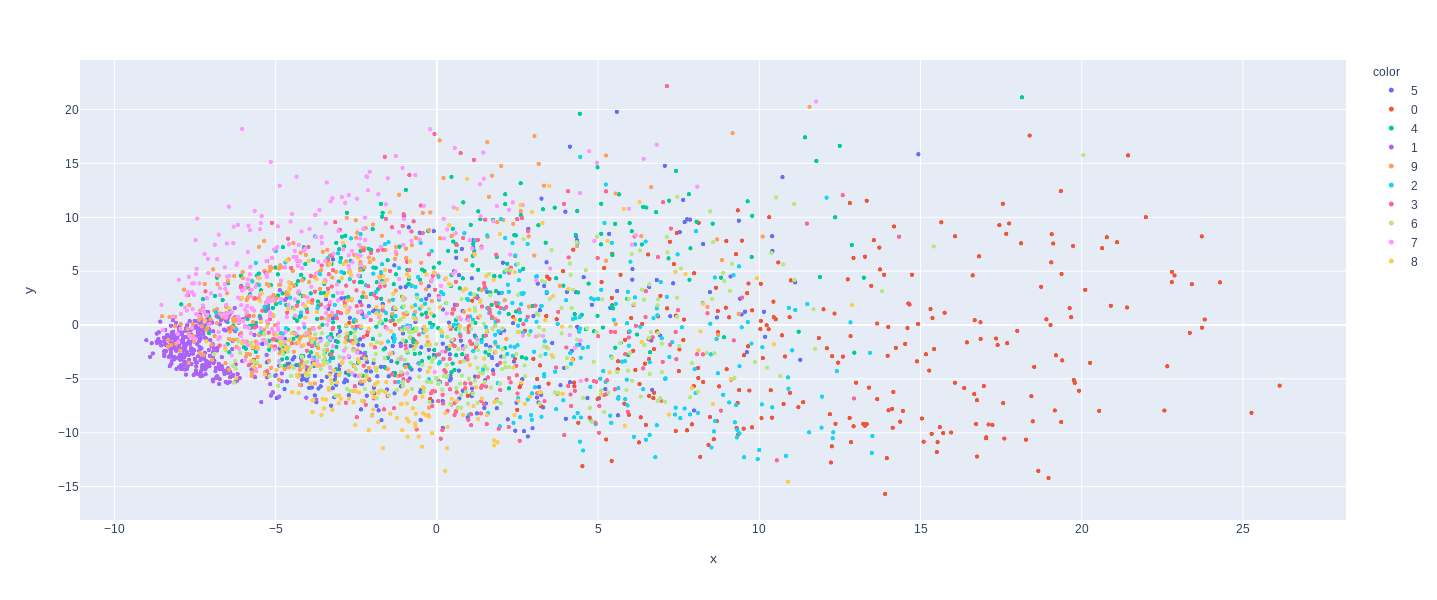

In [69]:
visualize_2d_data(transformed, color=y_train, marker_size=5)

#### Random projection

In [72]:
pipe2 = Pipeline([('scaling', StandardScaler()), 
                  ('random_projection', GaussianRandomProjection(n_components=3)),
                 ])

In [75]:
tren = pipe2.fit_transform(X_train)

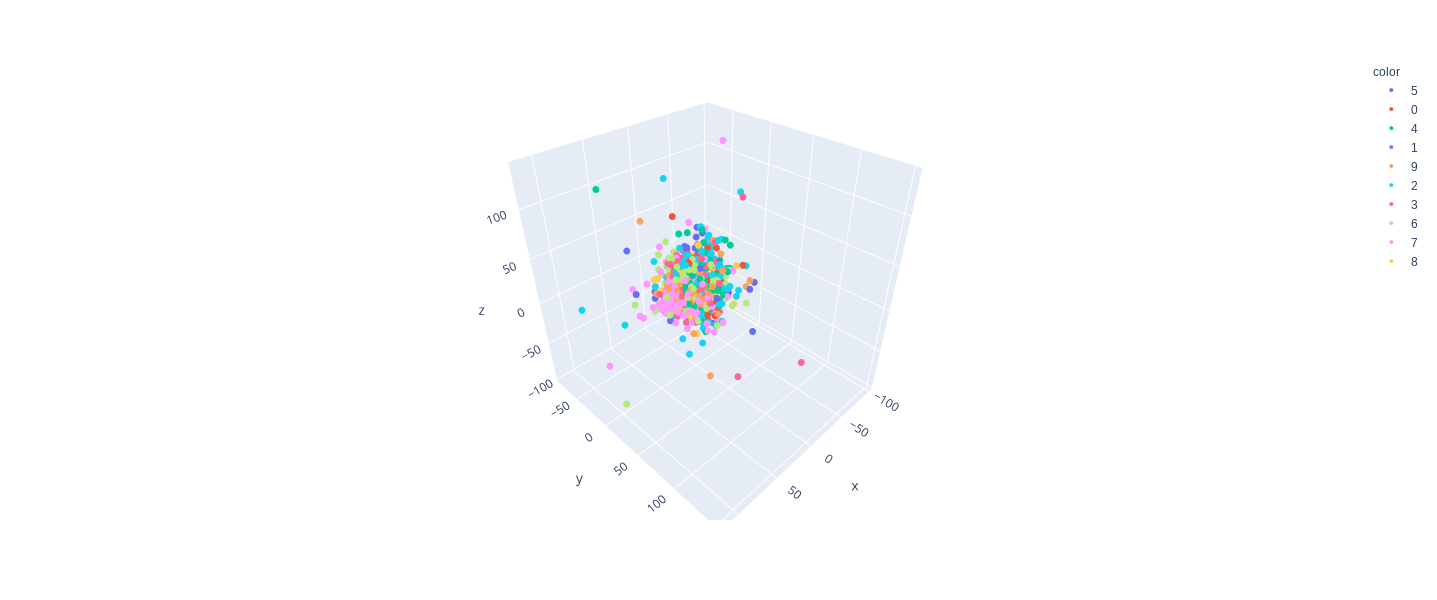

In [77]:
visualize_3d_data(tren, y_train)

#### Spectral embedding

In [ ]:
pipe3 = Pipeline([('scaling', StandardScaler()), 
                  ('spectral_embedding', SpectralEmbedding(n_components=3, affinity='rbf')),
                  ('knn', KNeighborsClassifier(n_neighbors=5))])
transformed3 = pipe3.fit(X_train, y_train)

In [ ]:
transformed3.score(X_test, y_test)

In [ ]:
fig = px.scatter_3d(x=transformed2[:,0], y=transformed2[:,1], z=transformed2[:,2], 
                    color=y)
fig.update_traces(marker=dict(size=2))
fig.show()